In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

filepath = os.path.abspath('')
utilpath = f'{filepath}/../util/'
sys.path.append(utilpath)
data_dir = f'{filepath}/../data'

# time intense
melbourne_sua = gpd.read_file(f'{data_dir}/prepared/geometry_melbourne_sua.shp')
melbourne_gcc = gpd.read_file(f'{data_dir}/prepared/geometry_melbourne_gcc.shp')

melb_data = pd.read_hdf(f'{data_dir}/melb_data.h5')

from melbourne import Melbourne

melbourne = Melbourne(melb_data)
df = melbourne.raw_df

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 7757 to 7872
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      82

In [3]:
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Month
7757,Coburg,21A Vincent St,3,h,985000.0,PI,Jellis,2017-05-13,7.8,3058.0,...,2.0,391.0,NaN,NaN,Moreland,-37.7418,144.9562,Northern Metropolitan,11204,5
4558,Oakleigh South,9 Emerald St,3,h,921000.0,S,hockingstuart,2017-03-18,14.7,3167.0,...,2.0,535.0,129.0,1970.0,Kingston,-37.9377,145.0856,South-Eastern Metropolitan,3692,3


In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Month
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378,7.052283
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772,2.536034
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,1.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000,5.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000,7.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000,9.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,12.000000


In [5]:
for nominal_feature in melbourne.nominal_features:
    the_nominal_features = melbourne.raw_df.loc[:, nominal_feature].sort_values().unique()
    print(f'''
        nominal feature: {nominal_feature}      cardinality: {len(the_nominal_features)}

        {the_nominal_features}
    ''')


        nominal feature: Suburb      cardinality: 314

        ['Abbotsford' 'Aberfeldie' 'Airport West' 'Albanvale' 'Albert Park'
 'Albion' 'Alphington' 'Altona' 'Altona Meadows' 'Altona North' 'Ardeer'
 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood' 'Aspendale'
 'Aspendale Gardens' 'Attwood' 'Avondale Heights' 'Bacchus Marsh'
 'Balaclava' 'Balwyn' 'Balwyn North' 'Bayswater' 'Bayswater North'
 'Beaconsfield' 'Beaconsfield Upper' 'Beaumaris' 'Bellfield' 'Bentleigh'
 'Bentleigh East' 'Berwick' 'Black Rock' 'Blackburn' 'Blackburn North'
 'Blackburn South' 'Bonbeach' 'Boronia' 'Box Hill' 'Braybrook'
 'Briar Hill' 'Brighton' 'Brighton East' 'Broadmeadows' 'Brookfield'
 'Brooklyn' 'Brunswick' 'Brunswick East' 'Brunswick West' 'Bulleen'
 'Bullengarook' 'Bundoora' 'Burnley' 'Burnside' 'Burnside Heights'
 'Burwood' 'Burwood East' 'Cairnlea' 'Camberwell' 'Campbellfield'
 'Canterbury' 'Carlton' 'Carlton North' 'Carnegie' 'Caroline Springs'
 'Carrum' 'Carrum Downs' 'Caulfield' 'Caulfield East' 'C

Clustering by the following nominal features:

* `Type`
* `Method`
* `Regionname`

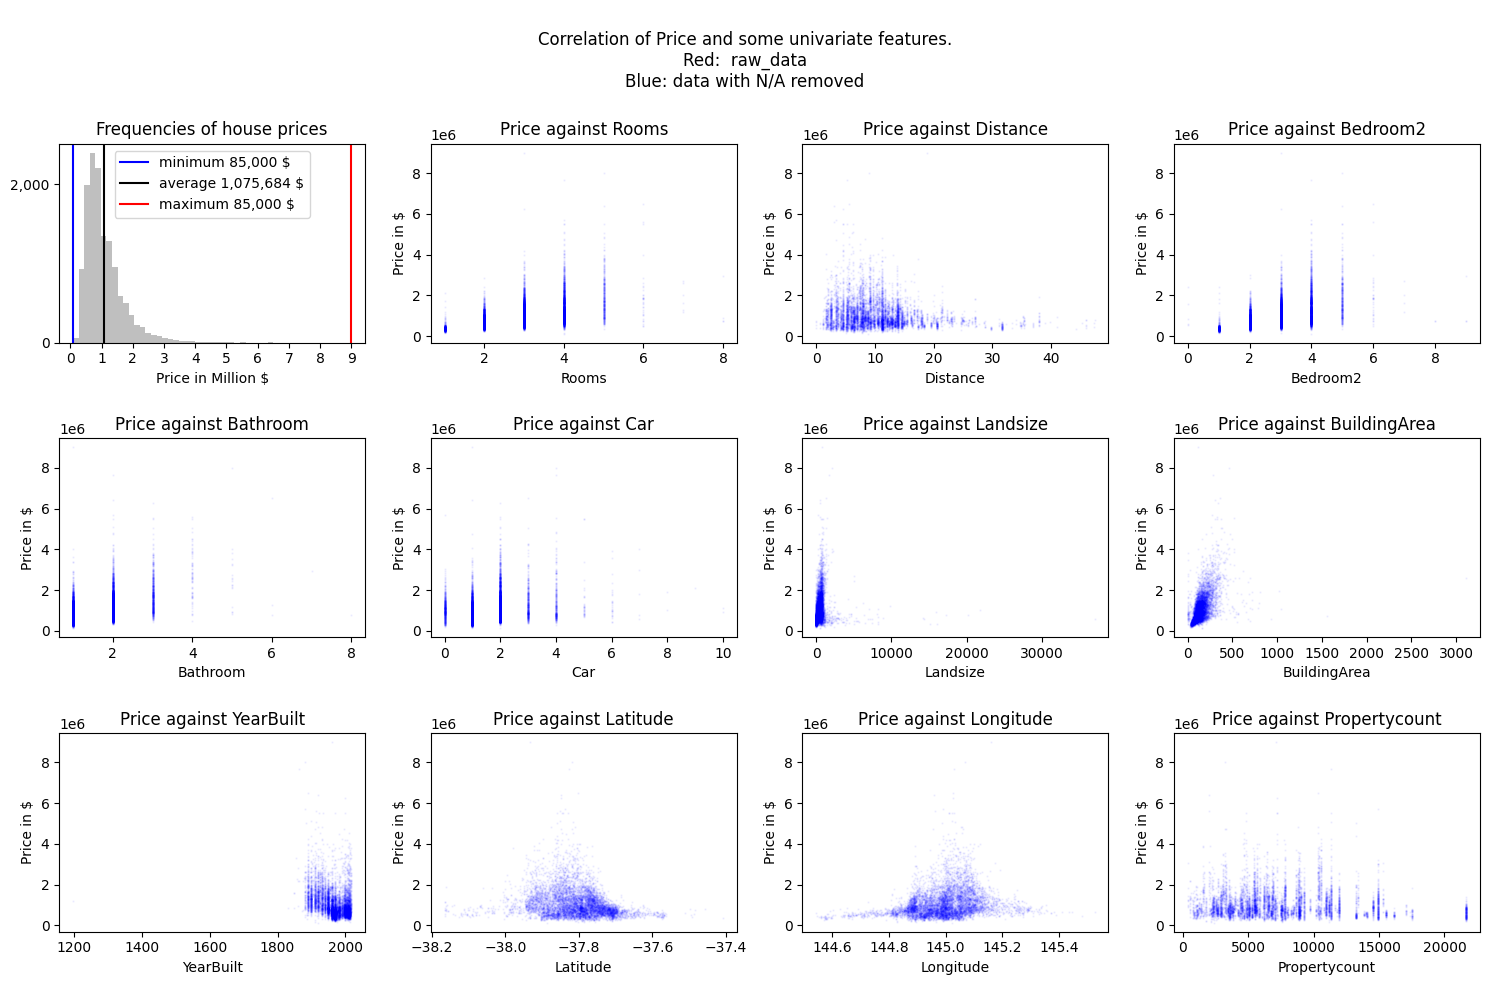

In [6]:
from matplotlib.ticker import MultipleLocator, FuncFormatter

fig, axes = plt.subplots(3, 4, figsize=(15, 10))

fig.suptitle('''
Correlation of Price and some univariate features.
Red:  raw_data
Blue: data with N/A removed
''')

ax = axes[0,0]
ax.set_title('Frequencies of house prices')
ax.set_xlabel('Price in Million \\$')
ax.xaxis.set_major_locator(MultipleLocator(base=1e6))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:,.0f}'))
ax.yaxis.set_major_locator(MultipleLocator(base=2e3))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

ax.hist(melbourne.prices, bins=50, range=(melbourne.min_price, melbourne.max_price), color='grey', alpha=.5)
ax.axvline(melbourne.min_price, color='blue', label=f'minimum {melbourne.min_price:,.0f} \\$')
ax.axvline(melbourne.mean_price, color='black', label=f'average {melbourne.mean_price:,.0f} \\$')
ax.axvline(melbourne.max_price, color='red', label=f'maximum {melbourne.min_price:,.0f} \\$')

ax.legend()

# Plot Price against predictor for each of the 11 numerical predictors

for ax, predictor in zip(axes.flatten()[1:], melbourne.numerical_features):
    ax.set(
        title=f'Price against {predictor}',
        xlabel=f'{predictor}',
        ylabel=f'Price in \\$'
    )
    # ax.scatter(melbourne.raw_df[predictor], melbourne.raw_df['Price'], s=.5, alpha=.05, color='red')
    ax.scatter(melbourne.df[predictor], melbourne.df['Price'], s=.5, alpha=.05, color='blue')

fig.tight_layout()
plt.show()